In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("results.csv")

In [3]:
data.head(10)

,year,city,avg_temp_athens,avg_temp_global
0,1753,Athens,17.35,8.39
1,1754,Athens,17.47,8.47
2,1755,Athens,17.22,8.36
3,1756,Athens,17.92,8.85
4,1757,Athens,17.68,9.02
5,1758,Athens,16.07,6.74
6,1759,Athens,17.11,7.99
7,1760,Athens,16.61,7.19
8,1761,Athens,17.65,8.77
9,1762,Athens,17.55,8.61


Moving average calculation 

In [4]:
data['global_avg_3'] = data["avg_temp_global"].rolling(window=3).mean()
data['global_avg_5'] = data["avg_temp_global"].rolling(window=5).mean()
data['global_avg_7'] = data["avg_temp_global"].rolling(window=7).mean()
data['city_avg_3'] = data["avg_temp_athens"].rolling(window=3).mean()
data['city_avg_5'] = data["avg_temp_athens"].rolling(window=5).mean()
data['city_avg_7'] = data["avg_temp_athens"].rolling(window=7).mean()

In [5]:
data.head(10)

,year,city,avg_temp_athens,avg_temp_global,global_avg_3,global_avg_5,global_avg_7,city_avg_3,city_avg_5,city_avg_7
0,1753,Athens,17.35,8.39,NaN,NaN,NaN,NaN,NaN,NaN
1,1754,Athens,17.47,8.47,NaN,NaN,NaN,NaN,NaN,NaN
2,1755,Athens,17.22,8.36,8.406667,NaN,NaN,17.346667,NaN,NaN
3,1756,Athens,17.92,8.85,8.560000,NaN,NaN,17.536667,NaN,NaN
4,1757,Athens,17.68,9.02,8.743333,8.618,NaN,17.606667,17.528,NaN
5,1758,Athens,16.07,6.74,8.203333,8.288,NaN,17.223333,17.272,NaN
6,1759,Athens,17.11,7.99,7.916667,8.192,8.260000,16.953333,17.200,17.260000
7,1760,Athens,16.61,7.19,7.306667,7.958,8.088571,16.596667,17.078,17.154286
8,1761,Athens,17.65,8.77,7.983333,7.942,8.131429,17.123333,17.024,17.180000
9,1762,Athens,17.55,8.61,8.190000,7.860,8.167143,17.270000,16.998,17.227143


In [6]:
data[data.iloc[:,0] == 1850] # row 97 #Used in order to isolate a specific pattern

,year,city,avg_temp_athens,avg_temp_global,global_avg_3,global_avg_5,global_avg_7,city_avg_3,city_avg_5,city_avg_7
97,1850,Athens,16.47,7.9,7.953333,8.1,8.0,16.96,17.202,17.167143


In [7]:
data.columns.get_loc("global_avg_3")
#data.iloc[3:,4]

4

In [8]:
data.index

RangeIndex(start=0, stop=261, step=1)

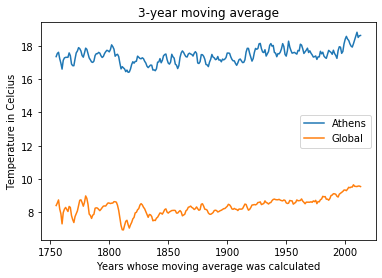

In [9]:
fig = plt.figure()
ax = plt.axes()

x = data.iloc[2:,0]
y = data.iloc[2:,4] #global
z = data.iloc[2:,7] #city

plt.title('3-year moving average')
ax.set_xlabel('Years whose moving average was calculated')
ax.set_ylabel('Temperature in Celcius')
ax.plot(x, z, label='Athens') 
ax.plot(x, y, label='Global')
ax.legend();

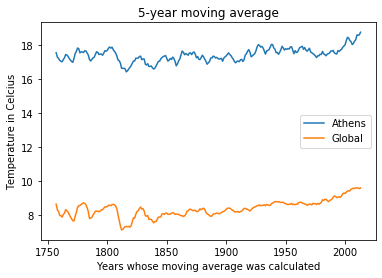

In [10]:
fig = plt.figure()
ax = plt.axes()

x = data.iloc[4:,0]
y = data.iloc[4:,5] #global
z = data.iloc[4:,8] #city

plt.title('5-year moving average')
ax.set_xlabel('Years whose moving average was calculated')
ax.set_ylabel('Temperature in Celcius')
ax.plot(x, z, label='Athens') 
ax.plot(x, y, label='Global')
ax.legend();

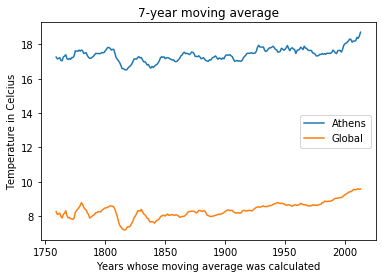

In [11]:
fig = plt.figure()
ax = plt.axes()

x = data.iloc[6:,0]
y = data.iloc[6:,6] #global
z = data.iloc[6:,9] #city

plt.title('7-year moving average')
ax.set_xlabel('Years whose moving average was calculated')
ax.set_ylabel('Temperature in Celcius')
ax.plot(x, z, label='Athens') 
ax.plot(x, y, label='Global')
ax.legend();

I would say that the 3-year moving average  depiction contains a lot of noise and it would be hard to identify important patterns

The 7-year moving average depiction has been filtered a lot and has lost a lot of patterns

The 5-year moving average is the best depiction in my opinion. It has been filtered of a lot of noise, but the important patterns have not been removed. Furthermore, it is easy to notice the general trends in both temperature measurements.

The diagram can be split in 2 periods, one until the year 1850 and one after that year. (Observation 1)

During the first period, both the global temperature and the temperature in Athens were subject to minor temperature fluctuations. In the second period it can been seen that there was a slight gradual increase in both observed temperatures.

Furthermore, it can be observed that both the line graph of global temperature and temperature in Athens had similar trends. That can been seen from a closer inspection of the 2 periods bellow. (Observation 2)

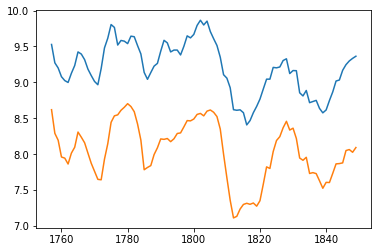

In [13]:
fig = plt.figure()
ax = plt.axes()

x = data.iloc[4:97,0]
y = data.iloc[4:97,5] #global
z = data.iloc[4:97,8] -8 #city
ax.plot(x, z) 
ax.plot(x, y);

Another small detail that should be noted is that in the cases were a peak or a minimum was observed in global temperature, a similar one was observed in the local temperature

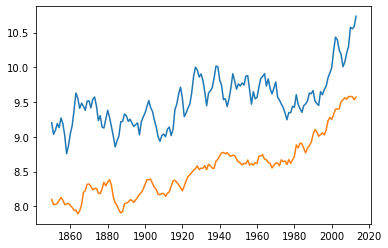

In [14]:
fig = plt.figure()
ax = plt.axes()

x = data.iloc[97:,0]
y = data.iloc[97:,5] #global
z = data.iloc[97:,8] -8 #city
ax.plot(x, z) 
ax.plot(x, y);

Calculation of average per 50 year (last segment includes 60 years)

In [15]:
print(data.columns.get_loc("global_avg_5"))
data.columns.get_loc("city_avg_5")

5


8

In [16]:
avg_global = []
avg_athens = []
years = []
difference = []
i = 0
year = 1753


for j in range(5): #average per 50 years calculation

    
    if(i<200):
        avg_global.append(data.iloc[i:(i+49),5].dropna().mean())
        avg_athens.append(data.iloc[i:(i+49),8].dropna().mean())
        years.append(str(year)+"-"+str(year+49))
        difference.append(avg_athens[j]-avg_global[j])
        
    else:
        avg_global.append(data.iloc[i:,5].dropna().mean())
        avg_athens.append(data.iloc[i:,8].dropna().mean())
        years.append(str(year)+"-"+str(2013)) 
        difference.append(avg_athens[j]-avg_global[j])
        
    i = i + 50
    year = year + 50

In [17]:
df = pd.DataFrame(list(zip(years, avg_athens, avg_global,difference)), columns=["Years", "Athens", "Global", "Difference"])

In [18]:
df

,Years,Athens,Global,Difference
0,1753-1802,17.387333,8.210089,9.177244
1,1803-1852,17.016286,7.876735,9.139551
2,1853-1902,17.248816,8.132980,9.115837
3,1903-1952,17.531388,8.477388,9.054000
4,1953-2013,17.767934,8.941869,8.826066


It can be clearly seen that Athens is hotter compared to the global average. (Observation 3)

The difference between the average temperature in Athens and the global average temperature has remained roughly the same at 9 degrees. (Observation 4)

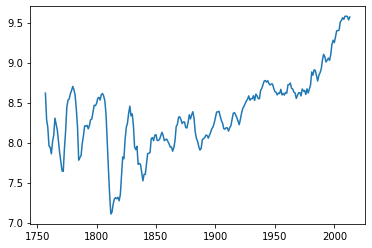

In [19]:
fig = plt.figure()
ax = plt.axes()

x = data.iloc[4:,0]
y = data.iloc[4:,5] #global
ax.plot(x, y);

It can be clearly seen from the line graph that for the years between 1750 and 1850 the temperature was fluctuating, until it reached a minimum at approximately 1830. Afterwards, the global temperature, as well as the temperature in Athens, have been gradually increasing. Seeing that pattern it can be safely assumed that the world is indeed getting hotter. (Observation 5)

A rough estimation of that increase would be that the temperature is increasing by 0.5 every 50 years or by 1 every 100 year. (Observation 6)

It should also be noted that until 1850, increased temperatures used to be compensated by low temperatures, thus keeping the average steady in the long term. It is safe to assume that temperatures used to cycle between low and hot. That pattern seems to have been disturbed, after the year 1850 temperature has been increasing without decreasing after a given period of time, as it used to before. (Observation 7)

In [29]:
cor = data.loc[:,["global_avg_5", "city_avg_5"]]
cor.dropna(inplace=True)
pearson_correlation = cor.corr()
pearson_correlation

,global_avg_5,city_avg_5
global_avg_5,1.000000,0.866516
city_avg_5,0.866516,1.000000


Positive correlation shows the two temperatures have an almost linear relationship and as one of them increases the other one should follow (Observation 8)

In [34]:
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

import numpy as np

In [44]:
X = cor["global_avg_5"].values.reshape(-1, 1)  # values converts it into a numpy array
y = cor["city_avg_5"].values.reshape(-1, 1)  # values converts it into a numpy array
model = LinearRegression(normalize=True)

model.fit(X, y)
score = model.score(X, y)

In [45]:
score

0.7508498883090051

In [46]:
test = np.array([5,10,15,20]).reshape(-1, 1) 

In [47]:
model.predict(test)

array([[14.99974654],
       [18.58822826],
       [22.17670998],
       [25.7651917 ]])

The above model can predict the avg temperature in Athens given the avg temperature in the world (Observation 9)

As can been seen from the predictions, the avg temperature is approximately 8 degrees hotter compared to the global avg, a similar value has been found comparing the values previously (Observation 10)